# Stock Price Prediction

## Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Reading the CSV file

We use the <code>read_csv()</code> function to read the data. we set <code>Date</code> as the index column.

In [2]:
stock_data = pd.read_csv('1613615-Stock_Price_data_set.csv', index_col='Date', parse_dates=True)
stock_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...
2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000


## Basic information
We first use the <code>info()</code> method to view the basic info of the dataframe.

In [3]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1009 entries, 2018-02-05 to 2022-02-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1009 non-null   float64
 1   High       1009 non-null   float64
 2   Low        1009 non-null   float64
 3   Close      1009 non-null   float64
 4   Adj Close  1009 non-null   float64
 5   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 55.2 KB


### Observation
1. There are 6 columns, with 5 being <code>float64</code>, and one being <code>int64</code>.
2. There are no null values.

## Description of data
The <code>describe()</code> method gives more information on the numerical columns.

In [4]:
stock_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


### Observation
1. All columns, except <code>'Volume'</code> are nearly equal to each other.

## Checking for duplicates
The <code>duplicated()</code> method tells whether there are any duplicates in the data.

In [5]:
stock_data.duplicated().sum()

0

### Observation
1. There are no duplicates in the data.

## Exploratory Data Analysis
In this stage, we start by answering some of the common questions.

### 1. How does <code>Open</code> vary over time?

<AxesSubplot:xlabel='Date'>

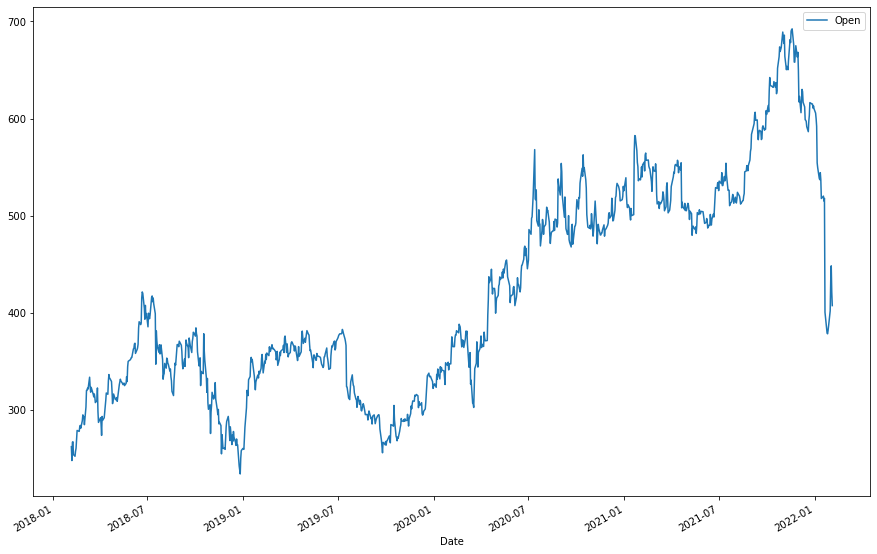

In [6]:
stock_data.plot(y='Open', figsize=(15,10))

### Observation
1. Even though there are sudden ups and downs, the values are mostly continuous.

### 2. How does <code>Volume</code> vary over time ?

<AxesSubplot:xlabel='Date'>

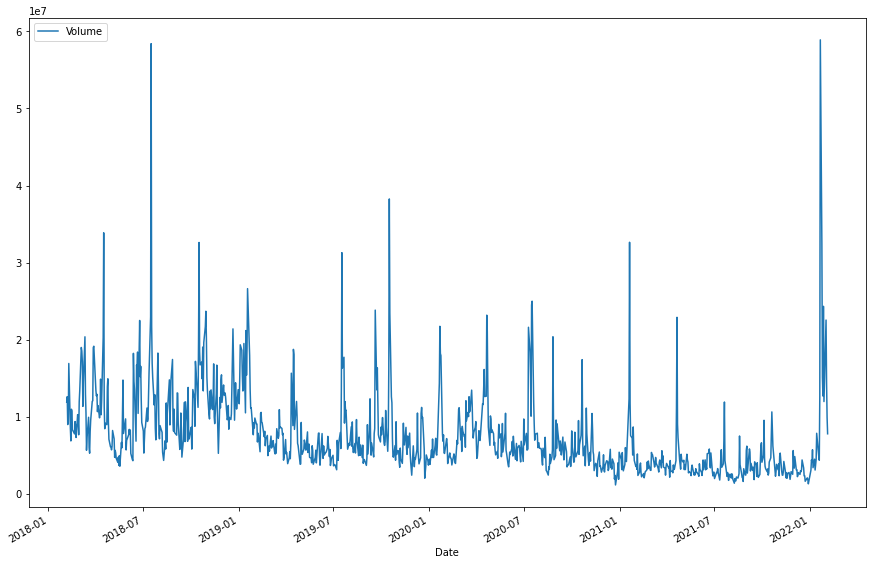

In [7]:
stock_data.plot(y='Volume', figsize=(15,10))

### Observation
1. The values in <code>Volume</code> column are highly unpredictable.

### 3. How is correlation between columns?

In [8]:
stock_data.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.998605,0.998508,0.996812,0.996812,-0.415838
High,0.998605,1.000000,0.998203,0.998551,0.998551,-0.400699
Low,0.998508,0.998203,1.000000,0.998544,0.998544,-0.432116
Close,0.996812,0.998551,0.998544,1.000000,1.000000,-0.413362
Adj Close,0.996812,0.998551,0.998544,1.000000,1.000000,-0.413362
Volume,-0.415838,-0.400699,-0.432116,-0.413362,-0.413362,1.000000


### Observation
1. <code>Volume</code> column have low correlation with all other columns.
2. <code>Open</code>, <code>High</code>, <code>Low</code>, <code>Close</code> and <code>Adj. Close</code> are highly correlated.

## Train and Test Data

In time series, the best approach for predicting future values is by using the old values as features.

In this, we use the previous 50 <code>Open</code> values to predict the next <code>Open</code> value.

In [9]:
# Finding the shape of dataset
stock_data.shape

(1009, 6)

The train and test data has 959 data points in total.

In [10]:
X = np.empty((959,50)) # Features
y = np.empty((959,))  # Target

for i in range(50,stock_data.shape[0]):
    X[i-50] = np.array(stock_data.iloc[i-50:i, 3]) # Store the last 50 'Close' values as features
    y[i-50] = stock_data.iloc[i, 0]                # Store the current 'Open' value as target

In [11]:
X.shape, y.shape

((959, 50), (959,))

We then split the dataset into train and test datasets.

In [12]:
train_size = 800
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

## Model Building
We use the <code>LinearRegression</code> model.

In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

We then fit the model using the training dataset.

In [14]:
model.fit(X_train, y_train)

LinearRegression()

Then let the model predict the targets for the test dataset.

In [15]:
y_pred = model.predict(X_test)

Plot the results to view how close they are to actual values.

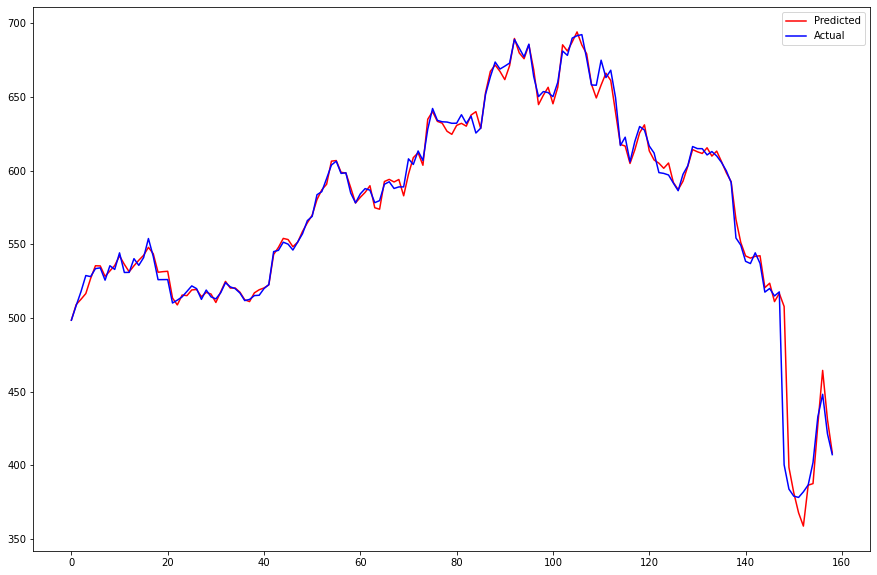

In [16]:
plt.figure(figsize=(15,10))
plt.plot(np.arange(y_test.shape[0]), y_pred, color='red', label='Predicted')
plt.plot(np.arange(y_test.shape[0]), y_test, color='blue', label='Actual')
plt.legend()

### Observation
The model performs poorly at sudden ups and downs. These ups and downs can't be predicted from the past data alone. Hence, this can be neglected.

## Model Evaluation

We evaluate the model by using the <code>mean_absolute_error</code> function in the <code>sklearn.metrics</code> module. This gives the mean of how much the predicted value varies from the actual value.

### With train data

In [17]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_train, model.predict(X_train))

3.438180197610309

### With test data.

In [18]:
mean_absolute_error(y_test, model.predict(X_test))

4.281228710963112

## Conclusion
A model to predict the future state of stock prices has been built. This model predict the future <code>Open</code> prices by using the past 50 prices as features.